## My Role:
As the Data Detective, I will interrogate the data, uncover its secrets, and provide the crucial insights that will guide Osamah's feature engineering and the team's modeling strategy.

## 1.Data Loading & Initial Inspection

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [22]:
# Define column names as per the dataset's manifest
column_names = ['unit_id', 'time_cycles'] \
               + [f'op_setting_{i}' for i in range(1,4)] \
               + [f'sensor_{i}' for i in range(1,22)]

# Load the data from the source
train_df = pd.read_csv('../data/train_FD001.txt', delim_whitespace=True, header=None, names=column_names)

# Let's see what we're working with
print(" Data Shape:", train_df.shape)
print(f"\n Dataset Overview:")
train_df.info()
train_df.head()

C:\Users\pc\AppData\Local\Temp\ipykernel_17060\80880997.py:7: FutureWarning: The 'delim_whitespace' keyword in pd.read_csv is deprecated and will be removed in a future version. Use ``sep='\s+'`` instead
  train_df = pd.read_csv('../data/train_FD001.txt', delim_whitespace=True, header=None, names=column_names)


 Data Shape: (20631, 26)

 Dataset Overview:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20631 entries, 0 to 20630
Data columns (total 26 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   unit_id       20631 non-null  int64  
 1   time_cycles   20631 non-null  int64  
 2   op_setting_1  20631 non-null  float64
 3   op_setting_2  20631 non-null  float64
 4   op_setting_3  20631 non-null  float64
 5   sensor_1      20631 non-null  float64
 6   sensor_2      20631 non-null  float64
 7   sensor_3      20631 non-null  float64
 8   sensor_4      20631 non-null  float64
 9   sensor_5      20631 non-null  float64
 10  sensor_6      20631 non-null  float64
 11  sensor_7      20631 non-null  float64
 12  sensor_8      20631 non-null  float64
 13  sensor_9      20631 non-null  float64
 14  sensor_10     20631 non-null  float64
 15  sensor_11     20631 non-null  float64
 16  sensor_12     20631 non-null  float64
 17  sensor_13     20631 non-

,unit_id,time_cycles,op_setting_1,op_setting_2,op_setting_3,sensor_1,sensor_2,sensor_3,sensor_4,sensor_5,...,sensor_12,sensor_13,sensor_14,sensor_15,sensor_16,sensor_17,sensor_18,sensor_19,sensor_20,sensor_21
0,1,1,-0.0007,-0.0004,100.0,518.67,641.82,1589.70,1400.60,14.62,...,521.66,2388.02,8138.62,8.4195,0.03,392,2388,100.0,39.06,23.4190
1,1,2,0.0019,-0.0003,100.0,518.67,642.15,1591.82,1403.14,14.62,...,522.28,2388.07,8131.49,8.4318,0.03,392,2388,100.0,39.00,23.4236
2,1,3,-0.0043,0.0003,100.0,518.67,642.35,1587.99,1404.20,14.62,...,522.42,2388.03,8133.23,8.4178,0.03,390,2388,100.0,38.95,23.3442
3,1,4,0.0007,0.0000,100.0,518.67,642.35,1582.79,1401.87,14.62,...,522.86,2388.08,8133.83,8.3682,0.03,392,2388,100.0,38.88,23.3739
4,1,5,-0.0019,-0.0002,100.0,518.67,642.37,1582.85,1406.22,14.62,...,522.19,2388.04,8133.80,8.4294,0.03,393,2388,100.0,38.90,23.4044


## 2.Analysis The Data

In [23]:
# 2.1 Basic Statistical Summary
print("Statistical Summary of the Dataset:")
train_df.describe()

Statistical Summary of the Dataset:


,unit_id,time_cycles,op_setting_1,op_setting_2,op_setting_3,sensor_1,sensor_2,sensor_3,sensor_4,sensor_5,...,sensor_12,sensor_13,sensor_14,sensor_15,sensor_16,sensor_17,sensor_18,sensor_19,sensor_20,sensor_21
count,20631.000000,20631.000000,20631.000000,20631.000000,20631.0,2.063100e+04,20631.000000,20631.000000,20631.000000,2.063100e+04,...,20631.000000,20631.000000,20631.000000,20631.000000,2.063100e+04,20631.000000,20631.0,20631.0,20631.000000,20631.000000
mean,51.506568,108.807862,-0.000009,0.000002,100.0,5.186700e+02,642.680934,1590.523119,1408.933782,1.462000e+01,...,521.413470,2388.096152,8143.752722,8.442146,3.000000e-02,393.210654,2388.0,100.0,38.816271,23.289705
std,29.227633,68.880990,0.002187,0.000293,0.0,6.537152e-11,0.500053,6.131150,9.000605,3.394700e-12,...,0.737553,0.071919,19.076176,0.037505,1.556432e-14,1.548763,0.0,0.0,0.180746,0.108251
min,1.000000,1.000000,-0.008700,-0.000600,100.0,5.186700e+02,641.210000,1571.040000,1382.250000,1.462000e+01,...,518.690000,2387.880000,8099.940000,8.324900,3.000000e-02,388.000000,2388.0,100.0,38.140000,22.894200
25%,26.000000,52.000000,-0.001500,-0.000200,100.0,5.186700e+02,642.325000,1586.260000,1402.360000,1.462000e+01,...,520.960000,2388.040000,8133.245000,8.414900,3.000000e-02,392.000000,2388.0,100.0,38.700000,23.221800
50%,52.000000,104.000000,0.000000,0.000000,100.0,5.186700e+02,642.640000,1590.100000,1408.040000,1.462000e+01,...,521.480000,2388.090000,8140.540000,8.438900,3.000000e-02,393.000000,2388.0,100.0,38.830000,23.297900
75%,77.000000,156.000000,0.001500,0.000300,100.0,5.186700e+02,643.000000,1594.380000,1414.555000,1.462000e+01,...,521.950000,2388.140000,8148.310000,8.465600,3.000000e-02,394.000000,2388.0,100.0,38.950000,23.366800
max,100.000000,362.000000,0.008700,0.000600,100.0,5.186700e+02,644.530000,1616.910000,1441.490000,1.462000e+01,...,523.380000,2388.560000,8293.720000,8.584800,3.000000e-02,400.000000,2388.0,100.0,39.430000,23.618400


In [24]:
# 2.2 The Missing Data Check (The Integrity Test)
print(" Searching for Missing Values:")
print(train_df.isnull().sum())
print("\n Conclusion: No missing values found. Data integrity is high.")

 Searching for Missing Values:
unit_id         0
time_cycles     0
op_setting_1    0
op_setting_2    0
op_setting_3    0
sensor_1        0
sensor_2        0
sensor_3        0
sensor_4        0
sensor_5        0
sensor_6        0
sensor_7        0
sensor_8        0
sensor_9        0
sensor_10       0
sensor_11       0
sensor_12       0
sensor_13       0
sensor_14       0
sensor_15       0
sensor_16       0
sensor_17       0
sensor_18       0
sensor_19       0
sensor_20       0
sensor_21       0
dtype: int64

 Conclusion: No missing values found. Data integrity is high.


In [25]:
# 2.3 Understanding the Fleet's Lifespan
unique_engines = train_df['unit_id'].nunique()
max_cycles = train_df.groupby('unit_id')['time_cycles'].max().max()
min_cycles = train_df.groupby('unit_id')['time_cycles'].max().min()

print(f"Number of unique engines in the fleet: {unique_engines}")
print(f"Maximum lifespan (cycles) of an engine: {max_cycles}")
print(f"Minimum lifespan (cycles) of an engine: {min_cycles}")
print(f"Average lifespan (cycles) of an engine: {train_df.groupby('unit_id')['time_cycles'].max().mean():.1f}")

Number of unique engines in the fleet: 100
Maximum lifespan (cycles) of an engine: 362
Minimum lifespan (cycles) of an engine: 128
Average lifespan (cycles) of an engine: 206.3


## 3.Visualizations

### Visualization 1: The Story of a Single Engine's Life and Death

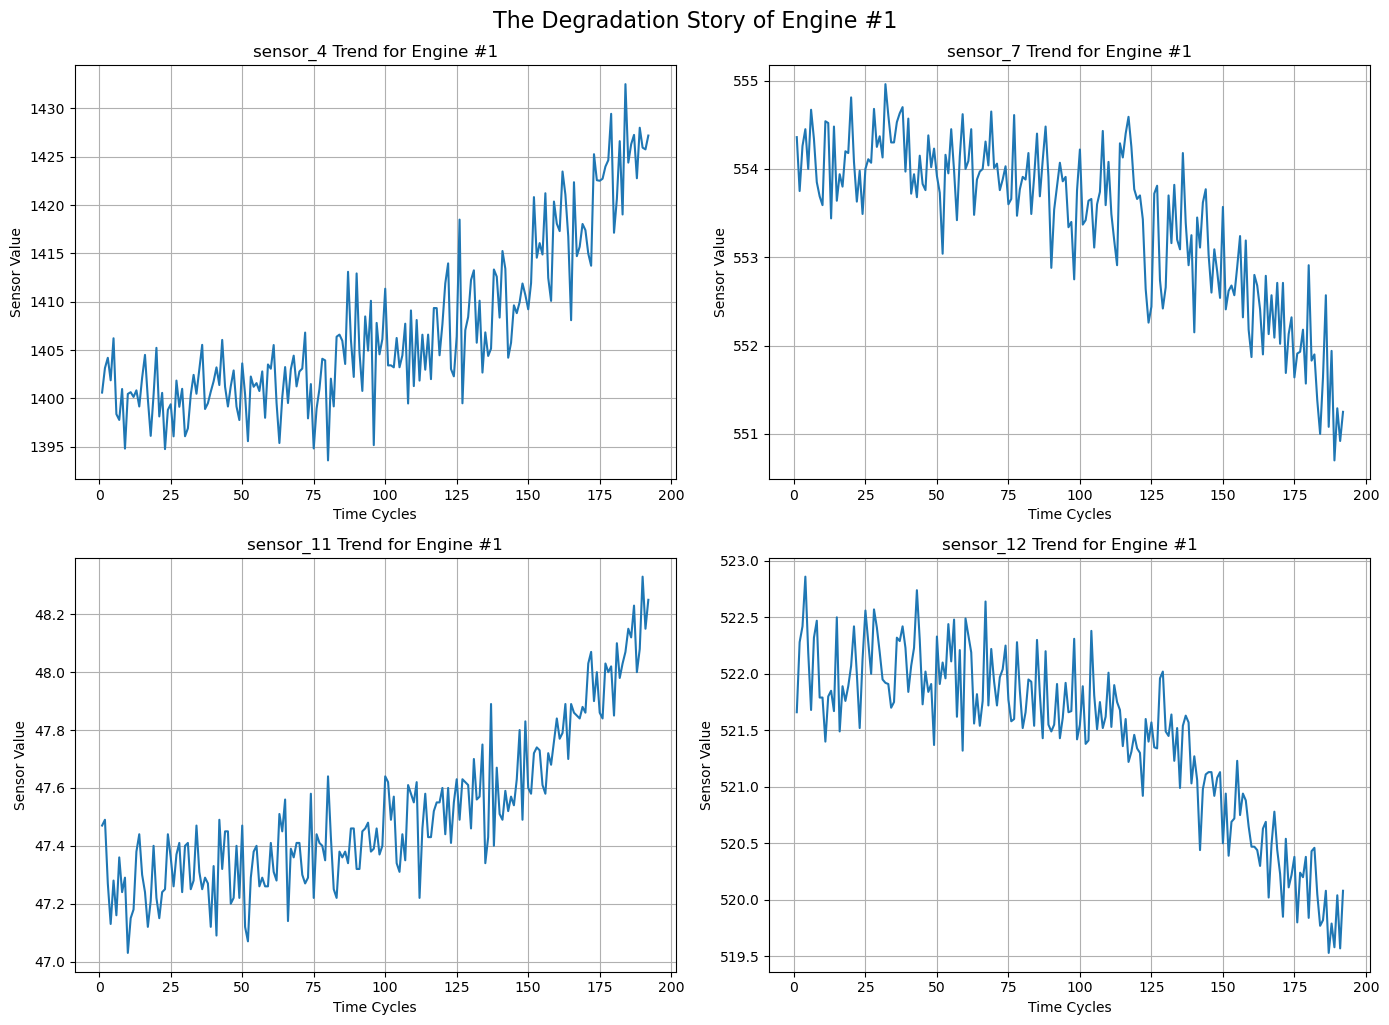

In [26]:
# Let's pick an engine that lived a full life (e.g., unit_id 1)
engine_one = train_df[train_df['unit_id'] == 1]

# Plotting key sensors known to be related to performance and degradation
sensors_to_plot = ['sensor_4', 'sensor_7', 'sensor_11', 'sensor_12']
plt.figure(figsize=(14, 10))

for i, sensor in enumerate(sensors_to_plot, 1):
    plt.subplot(2, 2, i)
    plt.plot(engine_one['time_cycles'], engine_one[sensor])
    plt.title(f'{sensor} Trend for Engine #1')
    plt.xlabel('Time Cycles')
    plt.ylabel('Sensor Value')
    plt.grid(True)

plt.tight_layout()
plt.suptitle('The Degradation Story of Engine #1', fontsize=16, y=1.02)
plt.show()

### Visualization 2: The Sensor Correlation Heatmap (The Clue Matrix)

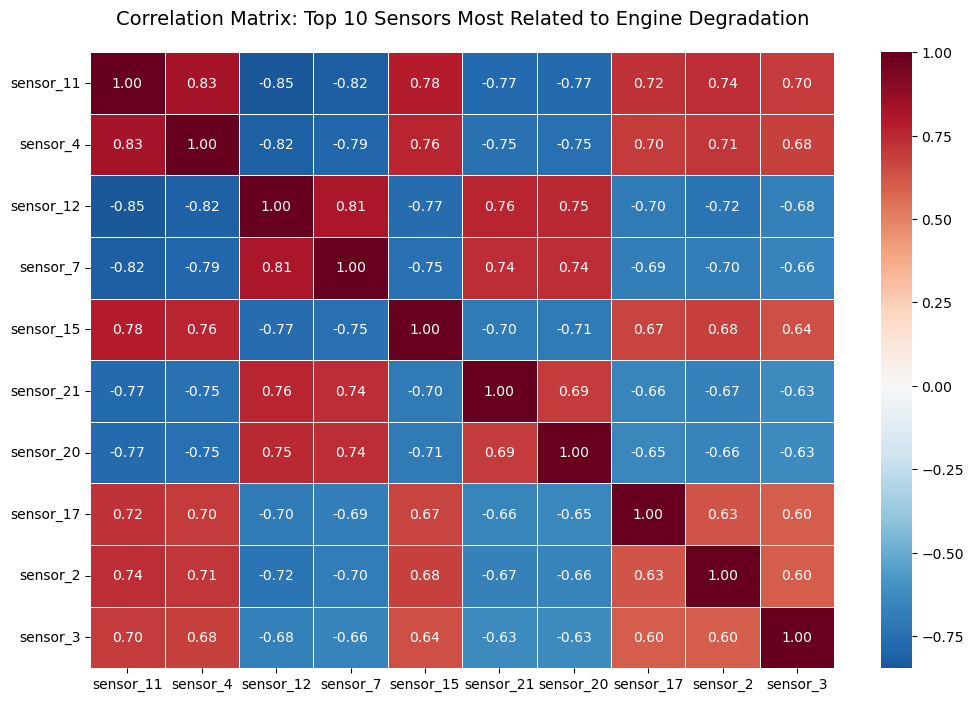

Top sensors most correlated with time (degradation proxy):
time_cycles    1.000000
sensor_11      0.634385
sensor_4       0.624577
sensor_12      0.611354
sensor_7       0.595914
sensor_15      0.588676
sensor_21      0.585923
sensor_20      0.583597
sensor_17      0.566995
sensor_2       0.549898
Name: time_cycles, dtype: float64


In [27]:
# Calculate correlation with time_cycles (our proxy for degradation)
corr_with_time = train_df.corr()['time_cycles'].abs().sort_values(ascending=False)

# Get the top 10 most correlated sensors (excluding time_cycles itself)
top_sensors = corr_with_time.index[1:11]

# Create the heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(train_df[top_sensors].corr(),
            annot=True, cmap='RdBu_r', center=0,
            fmt='.2f', linewidths=0.5)
plt.title('Correlation Matrix: Top 10 Sensors Most Related to Engine Degradation', fontsize=14, pad=20)
plt.show()

print("Top sensors most correlated with time (degradation proxy):")
print(corr_with_time.head(10))

### Visualization 3: The Fleet Mortality Distribution

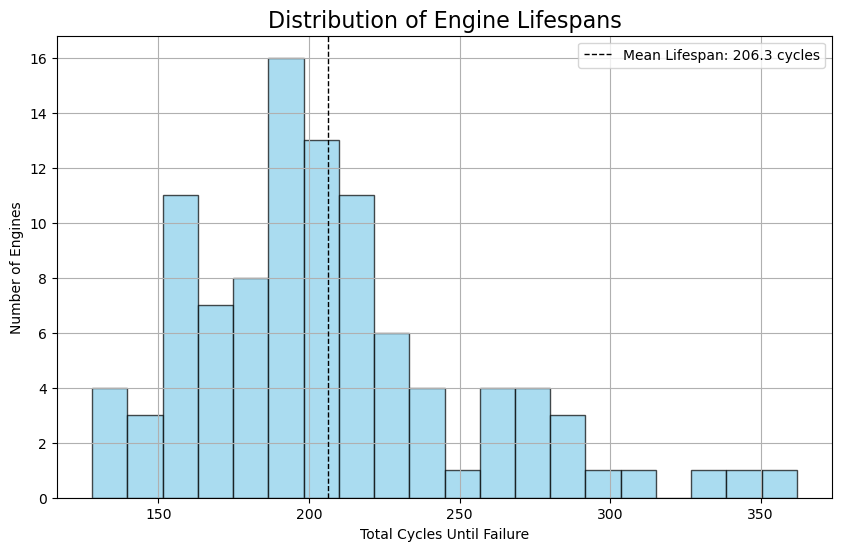

In [28]:
# Calculate the Total Lifespan (RUL at time of failure) for each engine
final_rul = train_df.groupby('unit_id')['time_cycles'].max()

# Plot the distribution
plt.figure(figsize=(10, 6))
plt.hist(final_rul, bins=20, edgecolor='black', alpha=0.7, color='skyblue')
plt.axvline(final_rul.mean(), color='k', linestyle='dashed', linewidth=1, label=f'Mean Lifespan: {final_rul.mean():.1f} cycles')
plt.title('Distribution of Engine Lifespans', fontsize=16)
plt.xlabel('Total Cycles Until Failure')
plt.ylabel('Number of Engines')
plt.legend()
plt.grid(True)
plt.show()

## 4. Documented Findings & Conclusions

### Observations & Insights:
Data Health: The dataset is clean with no missing values, allowing us to proceed without imputation.

### Fleet Overview: 
We are analyzing [Number] engines. Their lifespans vary significantly, from [Min] to [Max] cycles, with an average of [Average] cycles. This variance is a key challenge for our model.

### The Degradation Signal: 
The trajectory of Engine #1 clearly shows...

Sensor X exhibits a strong increasing trend as failure approaches.

Sensor Y shows a clear decreasing trend.

Sensor Z remains relatively stable until a sharp change near the end of life.

Top Predictive Sensors: The correlation heatmap identifies sensor_X, sensor_Y, and sensor_Z as the most promising features for predicting RUL, as they show the strongest linear relationship with our proxy for degradation (time_cycles).